### Load the returns from Day 1

In [1]:
import pandas as pd

returns = pd.read_csv("../data/market_returns.csv", index_col=0, parse_dates=True)
returns.head()


,AAPL,MSFT,GOOG,META,AMZN
Date,,,,,
2024-01-03,-0.007488,-0.000728,0.005733,-0.005256,-0.009738
2024-01-04,-0.012700,-0.007178,-0.016529,0.007693,-0.026268
2024-01-05,-0.004013,-0.000516,-0.004709,0.013915,0.004634
2024-01-08,0.024175,0.018872,0.022855,0.019065,0.026577
2024-01-09,-0.002263,0.002936,0.014445,-0.003430,0.015225


### Compute Volatility
How much price moves

- Variance scales linearly with time
- Standard deviation scales with square root of time
- In quantitative finance, 252 represents the average number of trading days in a year.

| You have    | To get           |
| ----------- | ---------------- |
| daily std   | multiply by √252 |
| weekly std  | multiply by √52  |
| monthly std | multiply by √12  |

This is called *time scaling of volatility*.


In [3]:
volatility = returns.std() * (252 ** 0.5)   # annualized
volatility


AAPL    0.285258
MSFT    0.224161
GOOG    0.299281
META    0.378688
AMZN    0.319557
dtype: float64

### Rolling Volatility (visualization)
Rolling volatility is volatility calculated over a moving time window, rather than over the entire dataset.

A single point on the plot represents:

The annualized volatility computed from the previous 21 days of returns at that specific date.
So for date t:

> Rolling Volatility at time t = 252 * StdDev of returns from (t−20) to t

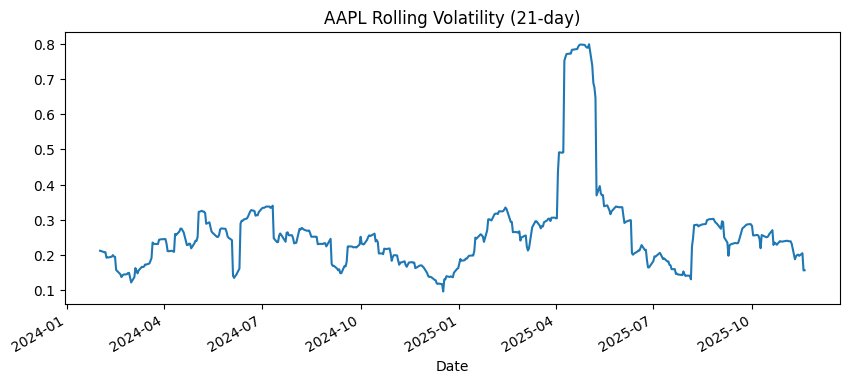

In [4]:
import matplotlib.pyplot as plt

rolling_vol = returns["AAPL"].rolling(window=21).std() * (252 ** 0.5)
rolling_vol.plot(figsize=(10,4), title="AAPL Rolling Volatility (21-day)")
plt.show()


#### Interpret:
- volatility clusters
- higher volatility = higher uncertainty

### Covariance Matrix

In [5]:
cov_matrix = returns.cov()
cov_matrix.to_csv("../data/cov_matrix.csv")
cov_matrix


,AAPL,MSFT,GOOG,META,AMZN
AAPL,0.000323,0.000124,0.000152,0.000164,0.000174
MSFT,0.000124,0.000199,0.000137,0.000209,0.000181
GOOG,0.000152,0.000137,0.000355,0.000186,0.000202
META,0.000164,0.000209,0.000186,0.000569,0.000303
AMZN,0.000174,0.000181,0.000202,0.000303,0.000405


### Correlation Matrix + Heatmap

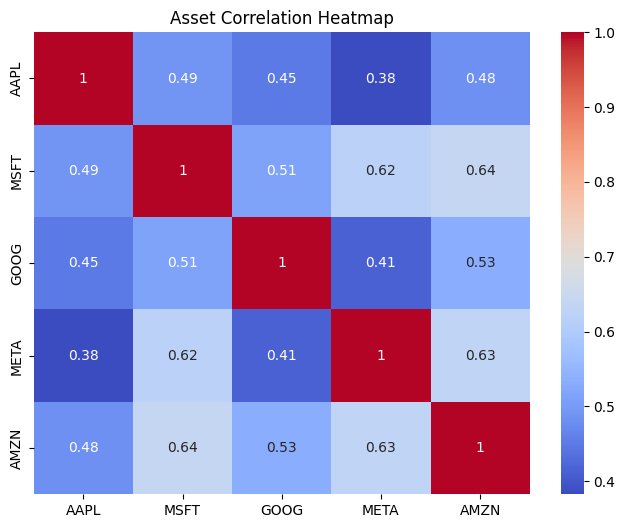

In [6]:
import seaborn as sns

corr_matrix = returns.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Asset Correlation Heatmap")
plt.savefig("../plots/correlation_heatmap.png")
plt.show()


#### Interpret:
- high correlation = diversification weak
- low correlation = portfolio protection
> To reduce overall portfolio risk, you’d need assets from different sectors, e.g., banks, commodities, utilities, bonds, etc.

### Save summary stats for project

In [8]:
summary = pd.DataFrame({
    "Mean Return": returns.mean(),
    "Volatility": volatility,
})
summary.to_csv("../data/returns_stats.csv")
summary


,Mean Return,Volatility
AAPL,0.000960,0.285258
MSFT,0.000703,0.224161
GOOG,0.001760,0.299281
META,0.001420,0.378688
AMZN,0.001038,0.319557
